In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Holochain.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,14-06-2021,0.008201,0.008642,0.007959,0.008308,1.459825e+08,1.434549e+09
1,13-06-2021,0.007363,0.008624,0.007286,0.008227,1.469585e+08,1.420506e+09
2,12-06-2021,0.007527,0.007627,0.007152,0.007362,8.186686e+07,1.271246e+09
3,11-06-2021,0.007854,0.008072,0.007396,0.007516,9.901449e+07,1.297837e+09
4,10-06-2021,0.008237,0.008297,0.007757,0.007846,1.113592e+08,1.354739e+09


In [4]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [5]:
df.drop(['Date'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1142 non-null   float64
 1   High        1142 non-null   float64
 2   Low         1142 non-null   float64
 3   Close       1142 non-null   float64
 4   Volume      1142 non-null   float64
 5   Market Cap  1142 non-null   float64
dtypes: float64(6)
memory usage: 53.7 KB


In [7]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1142.000000,1142.000000,1142.000000,1142.000000,1.142000e+03,1.142000e+03
mean,0.001845,0.002004,0.001713,0.001853,5.744244e+07,2.948482e+08
std,0.003578,0.003975,0.003250,0.003585,2.036103e+08,6.123116e+08
min,0.000286,0.000303,0.000219,0.000287,4.241020e+05,0.000000e+00
25%,0.000588,0.000615,0.000555,0.000587,5.110505e+06,9.139594e+07
50%,0.000802,0.000828,0.000766,0.000802,8.231455e+06,1.229252e+08
75%,0.001180,0.001257,0.001130,0.001187,1.392024e+07,1.586026e+08
max,0.028572,0.031568,0.025926,0.028481,2.413691e+09,4.818036e+09


In [8]:
df.shape

(1142, 6)

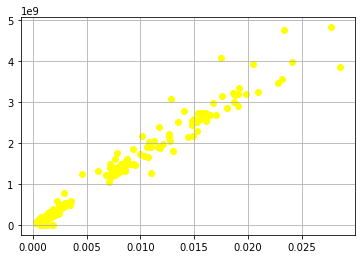

In [9]:
plt.scatter(df['Open'], df['Market Cap'], color='yellow')
plt.grid(True)
plt.show()

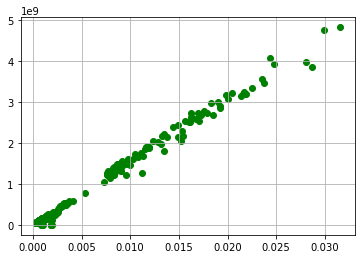

In [10]:
plt.scatter(df['High'], df['Market Cap'], color='green')
plt.grid(True)
plt.show()

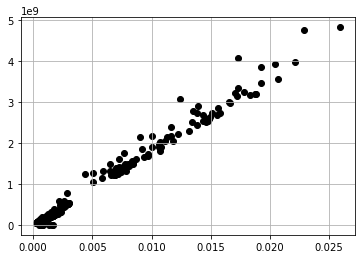

In [11]:
plt.scatter(df['Low'], df['Market Cap'], color='black')
plt.grid(True)
plt.show()

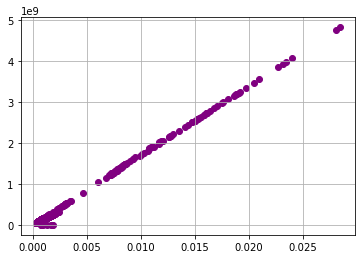

In [12]:
plt.scatter(df['Close'], df['Market Cap'], color='purple')
plt.grid(True)
plt.show()

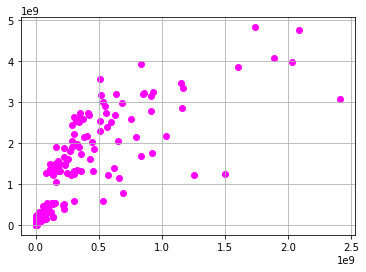

In [13]:
plt.scatter(df['Volume'], df['Market Cap'], color='magenta')
plt.grid(True)
plt.show()

In [14]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
X=df.drop(["Market Cap"], axis=1)

y=df["Market Cap"]

In [16]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

In [17]:
print(utils.multiclass.type_of_target(y))

continuous


In [18]:
print(utils.multiclass.type_of_target(y.astype('int')))

multiclass


In [19]:
print(utils.multiclass.type_of_target(encoded))

multiclass


In [20]:
regr = linear_model.LinearRegression()
regr.fit(X, encoded)

LinearRegression()

In [21]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 461.6930132191814
Coefficients: 
 [-7.48457351e+03 -2.52571387e+04 -2.12327573e+04  1.21796984e+05
 -3.83282895e-07]


In [22]:
X = sm.add_constant(X)

In [23]:
model = sm.OLS(encoded, X).fit()
predictions = model.predict(X) 

In [24]:
print_model = model.summary()
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     94.40
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           3.17e-83
Time:                        00:41:22   Log-Likelihood:                -8043.3
No. Observations:                1142   AIC:                         1.610e+04
Df Residuals:                    1136   BIC:                         1.613e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        461.6927      9.647     47.861      0.0

In [25]:
X_train, X_test, encoded_train, encoded_test = train_test_split(X, encoded, train_size=0.7)

In [26]:
y_pred = model.predict(X_test)

In [27]:
df1=pd.DataFrame({'Predicted values':y_pred,'Actual values':encoded_test})
df1

,Predicted values,Actual values
543,503.462734,416
949,528.867105,694
720,577.997237,990
1104,529.459817,669
1045,496.994920,132
...,...,...
745,610.111612,1017
406,489.373136,314
746,584.059406,1014
1128,535.093822,825


In [20]:
model1 =  LinearRegression()

In [21]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [22]:
X_train, X_test, encoded_train, encoded_test = train_test_split(X, encoded, train_size=0.7)

In [23]:
result = []
model1.fit(X_train, encoded_train)
result.append(model1.score(X_test, encoded_test))
result

[0.2514174106132875]

In [24]:
y_pred1 = model1.predict(X_test)

In [25]:
df2=pd.DataFrame({'Predicted values':y_pred1,'Actual values':encoded_test})
df2

,Predicted values,Actual values
0,491.437765,451
1,491.382137,496
2,600.394595,1029
3,485.403867,279
4,479.775259,153
...,...,...
338,482.112960,107
339,472.826556,40
340,499.633056,609
341,528.944612,834


In [26]:
import pickle
pkl_file= open('holochainf.pkl',"wb")
pickle.dump(model1,pkl_file)
pkl_file.close()